In [ ]:
# Time Series

In [ ]:
import pandas as pd

In [ ]:
dt_range = pd.date_range('2019 Feb 15 08:10', periods=5, freq='y')

In [ ]:
help(pd.date_range)

In [ ]:
dt_range

In [ ]:
dt_range = pd.date_range('2019 Feb 15 08:10', periods=5, freq='D')

In [ ]:
dt_range

In [ ]:
dt_range = pd.date_range('2019 Feb 15 08:10', periods=5, freq='M')

In [ ]:
dt_range

In [ ]:
type(dt_range)

In [ ]:
help(pd.Timestamp)

In [ ]:
pd.Timestamp('2019-08-02')

In [ ]:
pd.Timestamp('2019-08-02 08:40:00')

In [ ]:
pd.Timestamp('08-02-2019 08:40:00')

In [ ]:
t = pd.Timestamp('09 15 2021 08:04:00')

In [ ]:
type(t)

In [ ]:
t.date()

In [ ]:
t.day

In [ ]:
t.hour

In [ ]:
t.month

In [ ]:
t.dayofweek

In [ ]:
t.day_name()

In [ ]:
t.weekday()

In [ ]:
t.month_name()

In [ ]:
t.quarter

In [ ]:
t.minute

In [ ]:
# Time offsets

In [ ]:
help(pd.Timedelta)

In [ ]:
pd.Timedelta('1 day 1 ns')

In [ ]:
pd.Timestamp('2021-10-12 10 AM')+pd.Timedelta('2 hours 1 minutes 2 seconds')

In [ ]:
dt_range + pd.Timedelta('10 days')

In [ ]:
dt_range - pd.Timedelta('10 days')

In [ ]:
p = pd.Period('Sept 2021')

In [ ]:
p

In [ ]:
p.end_time

In [ ]:
t = pd.Timestamp('10 Sept 2021')

In [ ]:
(p.start_time<t) & (p.end_time>t)

In [ ]:
time_range = pd.period_range('2021 09 08 08:00', periods=4)

In [ ]:
time_range

In [ ]:
time_range = pd.period_range('2021 09 08 08:00', periods=4, freq='H')

In [ ]:
time_range = pd.period_range('2021 09 08 08:00', periods=4, freq='H')

In [ ]:
time_range = pd.period_range('2021 09 08 08:00', periods=4, freq='3M')

In [ ]:
# Offset Alias

In [ ]:
pd.date_range('2021/09/15', periods=4, freq='2h30min')

In [ ]:
# Indexing with timerange

In [ ]:
num_periods = 5

ts = pd.Series(range(num_periods), pd.period_range('2021-09-15 12:30', freq='30T', periods=num_periods))

In [ ]:
ts

In [ ]:
pd.Series(range(0,5), index=('a','b','c','d','e'))

In [ ]:
num_periods = 5

ts = pd.Series(range(num_periods), pd.period_range('2021-09-15 12:30', freq='1B', periods=num_periods))

In [ ]:
ts

In [ ]:
num_periods = 5

ts = pd.Series(range(num_periods), pd.date_range('2021-09-15 12:30', freq='1B', periods=num_periods))

In [ ]:
ts

In [ ]:
t = ts.to_period()

In [ ]:
t.to_timestamp()

In [ ]:
# Decomposing the model

# Trend

# Seasonality

# Cycles

# Irregularity

In [ ]:
# AR terms (p) is the lags of the dependent variable

# p= 5

# x(t)+x(t-1)+x(t-2)+.......x(t-5)

In [ ]:
# Stationary : Constant mean, constant variance

In [ ]:
# Aggregation 
# Smoothing 

In [ ]:
# MA : lagged forecasting errors in prediction equation.

# q = 5

# x(t) = e(t-1)+e(t-2)+....e(t-5)

In [ ]:
# Differencing : 

In [ ]:
# Without Trend & Seasonal Components

# AR
# MA
# ARIMA
# ARMA
# Simple Exponential Smoothing

In [ ]:
# Holt winters
# Prophet
# Sarima

In [ ]:
df = pd.read_csv("D:/data/Energy.csv", index_col = 0)

In [ ]:
df.head()

In [ ]:
# Convert the data as a time series object

In [ ]:
df.index = pd.to_datetime(df.index)

In [ ]:
df.columns = ['Energy production']

In [ ]:
df.isnull().sum()

In [ ]:
df.index.nunique()

In [ ]:
df.shape

In [ ]:
df.index.min()

In [ ]:
df.index.max()

In [ ]:
#import plotly.plotly as ply
import cufflinks as cf
import chart_studio.plotly as ply

In [ ]:
#! pip install chart-studio

In [ ]:
from chart_studio.plotly import iplot

In [ ]:
help(iplot)

In [ ]:
#!pip install plotly==3.10.0

In [ ]:
import plotly.graph_objs as go

In [ ]:
from chart_studio.plotly import iplot, iplot_mpl, plot_mpl

In [ ]:
964/12

In [ ]:
from statsmodels

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot(df)

In [ ]:
iplot(df, theme="pearl")

In [ ]:
fig = go.Figure(df)
fig.show()

In [ ]:
# Decompose the data

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

C:\Users\Deepstrats\AppData\Roaming\Python\Python36\site-packages\plotly\tools.py:122: UserWarning:

To use Plotly's matplotlylib functionality, you'll need to have matplotlib successfully installed with all of its dependencies. You're getting this error because matplotlib or one of its dependencies doesn't seem to be installed correctly.



PlotlyError: The `figure_or_data` positional argument must be `dict`-like, `list`-like, or an instance of plotly.graph_objs.Figure

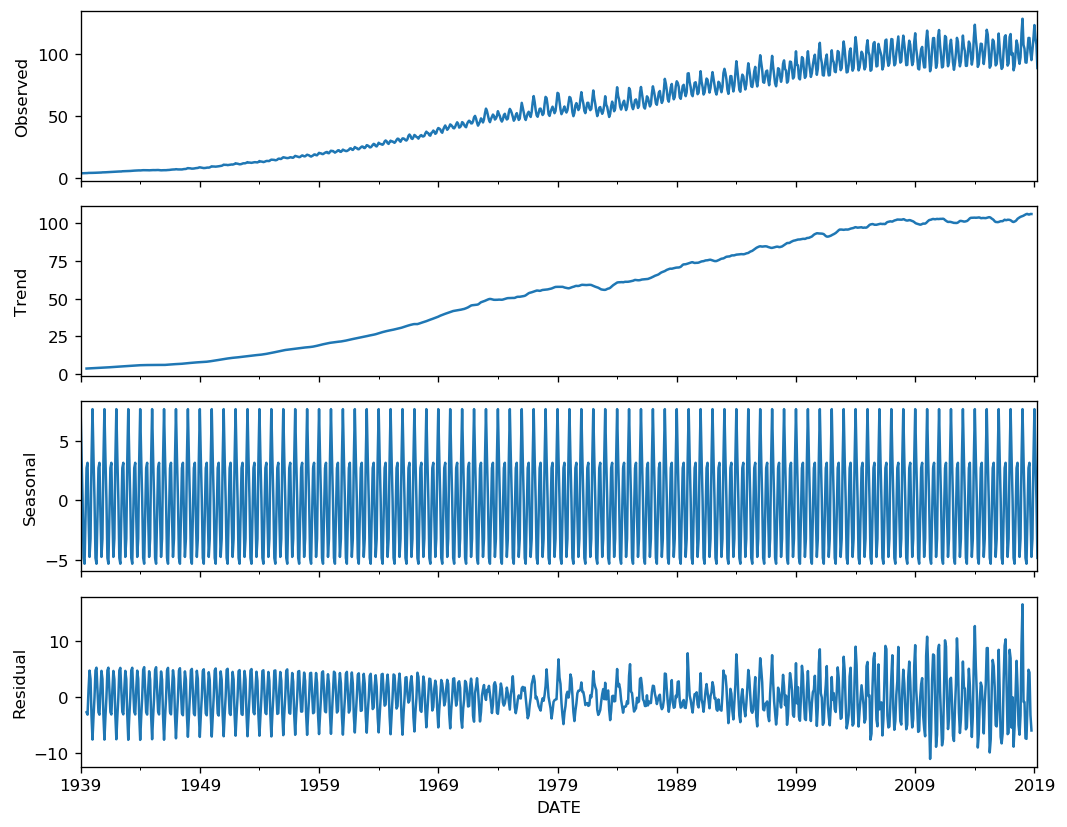

In [290]:
result = seasonal_decompose(df)
fig = result.plot()
plot_mpl(fig)

In [ ]:
#!pip install --user pmdarima

In [ ]:
from pyramid.arima import auto_arima

In [ ]:
stepwise_model = auto_arima(df, start_p=1,start_q=1,max_p=3,max_q=3, m = 12,start_P=0, 
                           seasonal=True, d= 1, D=1, trace=True,
                           error_action='ignore',suppress_warnings=True, stepwise=True)

In [ ]:
help(auto_arima)

In [ ]:
train = df.loc['1/1/1985':'01/01/2016']

In [ ]:
train

In [ ]:
test = df.loc['2017-01-01':]

In [ ]:
stepwise_model.fit(train)

In [ ]:
future_frecasting = stepwise_model.predict(n_periods=28)

In [ ]:
help(stepwise_model.predict)

In [ ]:
future_frecasting

In [ ]:
test.shape

In [ ]:
df.index.max()

In [ ]:
future_forecast = pd.DataFrame(future_frecasting, index=test.index, columns=['Predicted'])

In [ ]:
future_foreast

In [ ]:
pred = pd.concat([test,future_foreast], axis=1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
import numpy as np

In [ ]:
np.sqrt(mean_squared_error(test['Energy production'], future_foreast))

In [ ]:
# AR
# MA
# D
# ARIMA
# SARIMA
# HOLT WINTERS

In [ ]:
# AR
# yt = a+b1*yt-1 +b2*yt-2+bn*yt-n

In [ ]:
# expected yt = constant + linear combination of lags of y (upto p lags) 
# + linear combination of the errors of the forecasting lags (upto q lags)

In [ ]:
# Auto Correlation

# Partial Auto Correlation

In [ ]:
# Check for stationarity
# Adfuller test

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
from numpy import log

In [ ]:
res = adfuller(d.IPG2211A2N)

In [ ]:
print(res)

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

In [ ]:
d.columns

In [ ]:
d = pd.read_csv("D:/data/Energy.csv", names = ['value'], header=0)

In [ ]:
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})

In [ ]:
fig, axes = plt.subplots(3,2, sharex = True)
axes[0,0].plot(d.value)
axes[0,0].set_title("Actual data")
plot_acf(d.value, ax=axes[0,1])

axes[1,0].plot(d.value.diff());
axes[1,0].set_title("Ist order differencing")
plot_acf(d.value.diff(), ax=axes[1,1])

axes[2,0].plot(d.value.diff());
axes[2,0].set_title("2nd order differencing")
plot_acf(d.value.diff(), ax=axes[2,1])
plt.show()

In [ ]:
d1 = pd.read_csv("D:/data/Energy.csv", header = 0, index_col = 0)
plot_acf(d1)
plt.show()

In [ ]:
d1 = pd.read_csv("D:/data/Energy.csv", header = 0, index_col = 0)
plot_acf(d1, lags=100)
plt.show()

In [ ]:
d = pd.read_csv("D:/data/Energy.csv", names = ['value'], header=0)

In [ ]:
plot_pacf(d1)
plt.show()